# **Implementation of Logistic Regression on Titanic Dataset**

**importing required libraries:**

Panda for data analysis

Numpy for numerical computation

Seaborn for statistical plotting

Matplotlab.pyplot for plotting

math for basic mathematics

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib means the plots will be shown within notebook not through separate window.


**Reading the dataset**

In [3]:
titanic_data = pd.read_csv("titanic.csv")


**Checking dataset**

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Number of passengers:", str(len(titanic_data.index)))

Number of passengers: 891



# **Analyzing Data**
**Creating different plots to check the relationship between the variables**

<AxesSubplot:xlabel='Survived', ylabel='count'>

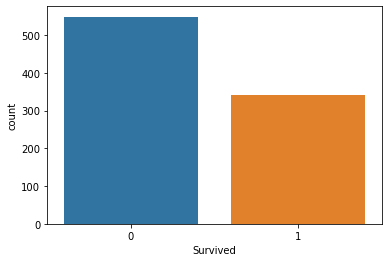

In [6]:
#checking for number of survived: 1 and unsurvived passengers: 0
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

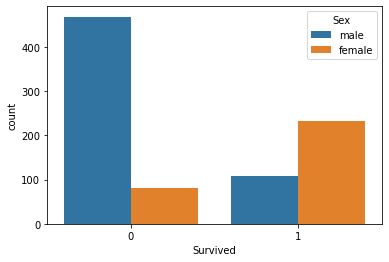

In [7]:
#checking the numbers of male and female who survived and unsurvived
sns.countplot(x="Survived", hue=("Sex"), data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

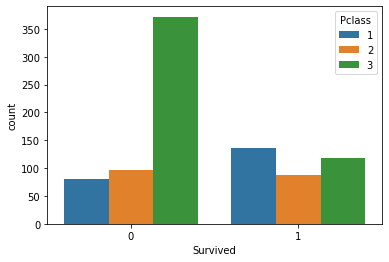

In [10]:
#checking the survived people classwise
sns.countplot(x = "Survived", hue = ("Pclass"), data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

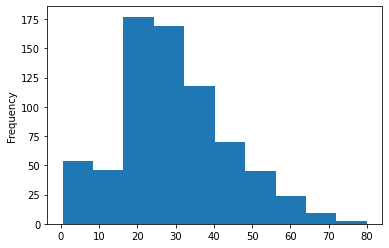

In [11]:
#Age wise distribution of the passangers
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

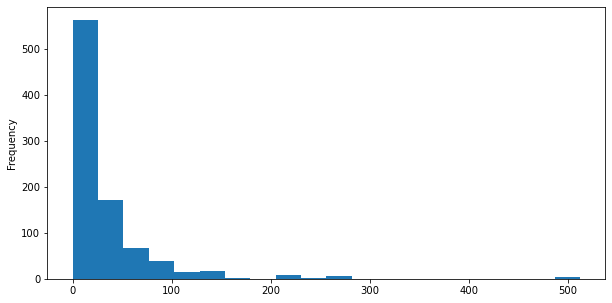

In [20]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [21]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

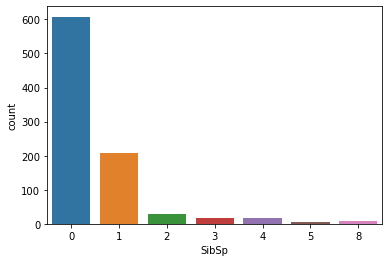

In [23]:
#here, we analyze SibSp(siblings)
sns.countplot(x ="SibSp", data = titanic_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

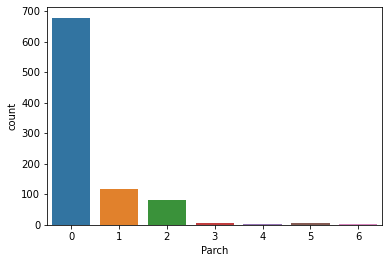

In [24]:
sns.countplot(x = "Parch", data = titanic_data)

# **Data Wrangling**
**Clean the data by removing the nan values and unnecessary columns in the datasets**

In [25]:
#let check the null values in the dataset... the true values show nulls values
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

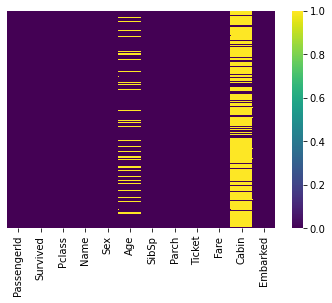

In [30]:
#the yellow color shows the null values for the given column
sns.heatmap(titanic_data.isnull(), yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

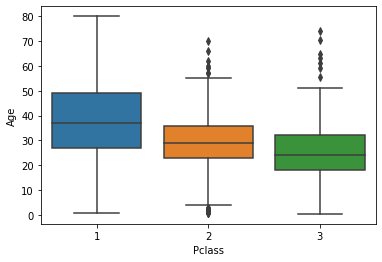

In [31]:
#most of the older passangers are in class 1
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [45]:
#to check the dataset for wrangling 
# we there are many NaN values in Cabin column
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
#To remove the Cabin column for cleaning dataset
titanic_data.drop("Cabin", axis=1, inplace=True)

In [43]:
#to check if the dataset is dropped
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
#to drop the null value
titanic_data.dropna(inplace=True)

<AxesSubplot:>

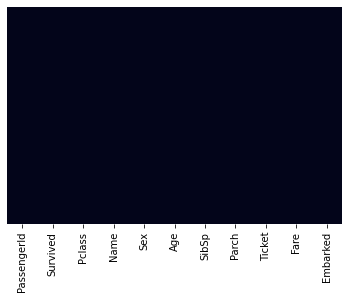

In [38]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cbar=False)

In [40]:
#to check numberically for null values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [51]:
#As the logistic regression doesn't understand string values so we are changing the string values categorically
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [53]:
#changing Ebarked column string to values 
embarked = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
pclass = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [55]:
#now add the cleaned columns back to the dataset instead of the old columns keeping strings
titanic_data=pd.concat([titanic_data, sex, embarked, pclass], axis=1)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [62]:
#we drop the irrelavent /unneeded columns 
titanic_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Ebarked'], axis=1, inplace=True)

In [63]:
titanic_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


# **Train and Test Data**
**We are building a model on the Train_Data and then we will be testing
  The model on the Test_Data**
 - - - - - - - - - - - - - - - 
logistic = LogisticRegression()
 - - - - - - - - - - - - - - - 
logistic.fit(train_X, train_Y)

In [83]:
#We initialize Independent variable X (columns are considered as features )
X = titanic_data.drop("Survived",axis=1)
#Here we initialize dependet variable Y (Survived column to check weather it can survive or not)
Y = titanic_data["Survived"]

In [84]:
#Now we split data for training and testing 
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression

In [102]:
logmodel = LogisticRegression(max_iter=300)

In [107]:
logmodel.fit(X_train, Y_train)

LogisticRegression(max_iter=300)

# **Accuracy Check**
**Calculate accuracy to check how accurate result we are achieving**

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [125]:
predictions = logmodel.predict(X_test)
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.83      0.82       126\n           1       0.75      0.73      0.74        88\n\n    accuracy                           0.79       214\n   macro avg       0.78      0.78      0.78       214\nweighted avg       0.79      0.79      0.79       214\n'

In [126]:
confusion_matrix(Y_test, predictions)

array([[105,  21],
       [ 24,  64]])

In [128]:
accuracy_score(Y_test, predictions)

0.7897196261682243

# ** Logictic Regression model is completed for Titanic Dataset**